In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_rows', 600)

In [2]:
zori_df = pd.read_csv("../data/Metro_zori_sm_month.csv")
zhvi_df = pd.read_csv("../data/Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv")
# data cleaning and pruning
zori_cols = ["RegionID", "RegionName", "RegionType", "StateName", "SizeRank", "4/30/23"]
zori_df = zori_df[ zori_cols ]
zori_df.rename(columns={"4/30/23": "2023-04-30-rents"}, inplace=True)
zori_df.dropna(subset="2023-04-30-rents", inplace=True)

zhvi_cols = ["RegionID", "RegionName", "RegionType", "StateName", "SizeRank", "2023-04-30"]
zhvi_df = zhvi_df[ zhvi_cols ]
zhvi_df.rename(columns={"2023-04-30": "2023-04-30-prices"}, inplace=True)
zhvi_df.dropna(subset="2023-04-30-prices", inplace=True)

zhvi_cols_pre_merge = ["RegionID", "2023-04-30-prices"]
zhvi_df = zhvi_df[ zhvi_cols_pre_merge ]

jdf = pd.merge(zori_df,zhvi_df, on="RegionID", how="inner")
jdf

# Want: cheap purchase and high rent
# Rent: 12 * rent / price

jdf["RPR"] = jdf["2023-04-30-rents"] / jdf["2023-04-30-prices"] * 100
jdf = jdf[jdf["RegionID"] != 102001]
xdf = (
    jdf[ (jdf["SizeRank"] < 200) & (jdf["2023-04-30-prices"] < 300.0e3)]
    .sort_values("RPR", ascending=False).reset_index(drop=True)
)
display(xdf)


,RegionID,RegionName,RegionType,StateName,SizeRank,2023-04-30-rents,2023-04-30-prices,RPR
0,395096,"Shreveport, LA",msa,LA,141,1256.075709,152712.703615,0.822509
1,394972,"Peoria, IL",msa,IL,136,1110.829768,135229.024294,0.821443
2,394421,"Brownsville, TX",msa,TX,130,1256.577778,159139.808466,0.789606
3,394372,"Beaumont, TX",msa,TX,140,1209.200784,154803.296989,0.781121
4,395171,"Tuscaloosa, AL",msa,AL,188,1530.628070,206238.625075,0.742164
5,394561,"El Paso, TX",msa,TX,69,1502.083331,204010.226581,0.736278
6,394387,"Binghamton, NY",msa,NY,195,1166.911325,158854.110710,0.734581
7,395160,"Toledo, OH",msa,OH,93,1232.093624,170806.541035,0.721339
8,394711,"Jackson, MS",msa,MS,98,1320.591491,183119.124108,0.721165
9,394761,"Lafayette, LA",msa,LA,116,1278.084416,177409.311609,0.720416


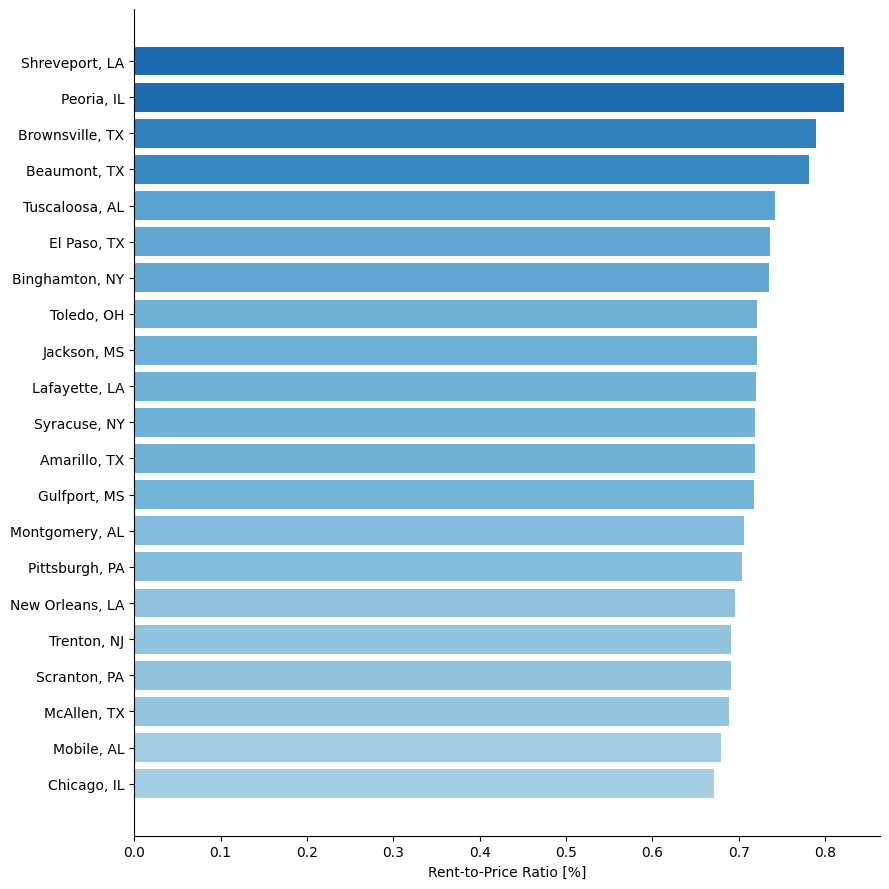

In [37]:
pdf = xdf.loc[0:20].sort_values("RPR")

my_cmap = plt.get_cmap("Blues")
XMAX = 0.9
XMIN = 0.55
rescale = lambda y: (y - XMIN) / (XMAX - XMIN)


fig = plt.figure(figsize=(9,9))
ax = plt.gca()
#fig, ax = plt.subplots()
y_pos = np.arange(len(pdf))
plt.barh(y_pos,pdf["RPR"], color=my_cmap(rescale(pdf["RPR"])))
xx = ax.set_yticks(y_pos, labels=pdf["RegionName"])
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_xlabel("Rent-to-Price Ratio [%]")
fig.tight_layout()
plt.savefig("price-to-rent.png")